In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as la
import scipy.linalg as sla
from CA_4_support import *

from matplotlib import animation,rc
from IPython.display import HTML

<div class="alert alert-info">


# 1) Motivation and goals of this activity

## Harmonic Oscillators
    
    
<img src="oscillator.png" width=600>
    
    
In your Physics class, you have learned about mass-spring systems. In the example above, a mass $m$ is connected to a spring $k$, which is attached to a fixed support (wall). When modeling the spring force using the Newton's law, and adding possible friction $c$ between the mass and the ground, the mass position $y$ as a function of time $t$ can be obtained from the solution of an ordinary differential equation (ODE) of the form: 
    

$$m y''(t) + c y'(t) + k y(t) = 0$$
    

You can take other classes to learn how to solve this type of equation. 
You can take MATH 285 or MATH 441 to learn how to solve these equations analytically, or CS 450 and TAM 470 to learn how to solve them numerically. In this activity, we will just give you a brief overview on how we can transform ODEs and PDEs (Partial Differential Equations) into System of Linear Equations, so that you can solve them using your  knowledge from CS 357.
    
</div>


# 2) Steady-State Advection Diffusion Equation

For the remainder of this notebook, we will be solving ODEs and PDEs for the variable $u$ that varies with $x$. Consider the following ODE for $x$ in the interval $[-1,1]$:

$$-u''(x) + u'(x) = f(x)$$

We need two additional equations in order to find a unique solution. For this example, we assume we know the value for $u$ at the domain ends, which yields the following boundary conditions:

$$u(-1) = u(1) = 0$$
           
Here, $f(x)$ is a known function and $u(x)$ is the unknown that we are trying to solve for.

# 3) Numerical Method to obtain the approximate solution $u(x)$ 


The **spectral element method (SEM)** is a way to solve these type of ODE numerically. 

In the simplest case, SEM approximates the solution $u(x)$ by a polynomial of degree $N$. A polynomial can be uniquely described by $P = N+1$ points on the interval $[-1,1]$ (interpolation is also covered in CS 450!).  So the SEM introduces a set of $N+1$ discrete points, splitting the domain into $N$ intervals, as indicated in the image below. 

$$-1 = x_0 < x_1 < x_2 < \dots < x_{N-1} < x_N = 1$$


<img src="discretization.png" width=600>


The goal is to find the approximate solution $u$ at each point $x_i$. Here, we represent the solution as the vector $\mathbf{u} = [u_1,u_2,\dots,u_{N-1}]^T$, where $u_i = u(x_i)$ for $i = 1,2,\dots,N-1$.


Note that we exclude the points $x_0=-1$ and $x_N = 1$ because we already know the value of $u_0$ and $u_N$ from the boundary conditions.

To get the approximate solution ${\bf u}$, we solve the system of linear equations 


$$\mathbf{A}\mathbf{u} = \mathbf{b}$$

For this activity, we will provide:

- The matrix ${\bf A}$ obtained using the SEM method, which depends on the ODE that you are trying to solve

- The right-hand side ${\bf b}$ that depends on the function $f(x)$.

- The set of points ${\bf x}$. Note that the points appear to be equally distributed, but that is not necessarily always the case. 

Later in CS 357 you will learn about Finite Difference Method, that can also be used to solve ODEs. 

# 4) Back to the Steady-State Advection Diffusion Example

We want to solve the ODE for $x$ in the interval $[-1,1]$:

$$-u''(x) + u'(x) = f(x)$$

with boundary conditions:

$$u(-1) = u(1) = 0$$

**We provide the function**

```python
A,x =  SEM_system_1(N)
```

that takes the polynomial order $N$ as input (scalar), and returns the points $x_i$ in the interval $([-1,1]$ and the system matrix $\mathbf{A}$. 

The returned 1d numpy array `x` has shape `(N+1,)`, since it includes the end points. The system matrix `A` is stored as a 2d numpy array with shape `(N-1,N-1)`, since it does not include information about the end points.

**We provide the function**

```python
b = SEM_rhs_1(f,x)
```

that takes a function `f` and the 1d numpy array `x` and returns the right-hand side vector `b` as a 1d numpy array with shape `(N-1,)`

**Check your answer:**

Define the function $f$ with the signature:
```python
def f(x):
    return value
```

that takes a position $x$ and evaluates $f(x) = 2(x-1)$.

In [4]:
#grade_clear
def f(z):
    return 2*(z-1)

**Check your answer:**

Use  `N = 30` to generate the arrays $\mathbf{A}$, $\mathbf{b}$, and $\mathbf{x}$.

In [5]:
N = 30

In [6]:
#grade_clear
A,x = SEM_system_1(N)
b = SEM_rhs_1(f,x)

**Try this!**

Check out the shapes of all 3 objects

In [7]:
#clear
print(A.shape)
print(x.shape)
print(b.shape)

(29, 29)
(31,)
(29,)


**Check your answers:**

Use your known quantities $\mathbf{A}$, $\mathbf{b}$ to obtain your approximate solution $\mathbf{u}$. 

Create the variable `u_approx1` with shape `(N+1,)`, which uses the solution $\mathbf{u}$ and adds the boundary condition at the appropriate locations.


In [8]:
#grade_clear
u = la.solve(A,b)
u_approx1 = np.append(np.append(0,u),0) # add boundary conditions back
u_exact = x**2 - 1

Plot your numerical approximation and the exact solution $u_e(x) = x^2 - 1$.  Do the two solutions match up?

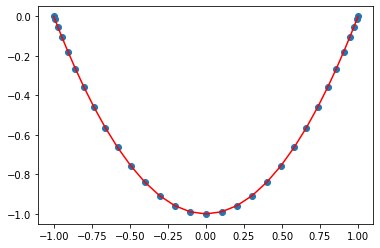

In [9]:
plt.plot(x,u_approx1,'o')
plt.plot(x,u_exact,'r')

Wrap the above solution in the function `solve_example_1(N)` so that you can plot the approximate solution versus the exact for varying values of N. Run your function using larger and smaller values. What do you notice?

In [12]:
def solve_example_1(N):

    # add code here
    ua = ...
    ue = ...
    
    #clear    
    A,x = SEM_system_1(N)
    b = SEM_rhs_1(f,x)
    u = la.solve(A,b)
    ua = np.append(np.append(0,u),0) # add boundary conditions back
    ue = x**2 - 1
    #clear
    plt.plot(x,ua,'o')
    plt.plot(x,ue,'r')
    return

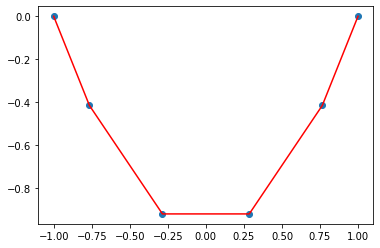

In [13]:
solve_example_1(5)

The solution will change for different right hand sides.  Experiment with different functions $f(x)$ and see what the solution looks like. For example, try the function:

$$ f(x) = \sin(1.5 \pi x) $$

**Note that since your ODE has not changed, your system matrix  $\mathbf{A}$ is still the same! You only need to redefine the vector $\mathbf{b}$ before you solve for $\mathbf{u}$.** In fact, if you used LU for your solution above, you could even just re-use the factorization, and save on computational time!

Hint: Check that you still have the same system matrix $\mathbf{A}$ at the start of this notebook, defined for $N = 30$. Make sure you are not re-using some of the variables defined above that are checked for grade, for example, `b`. As good practice, you should always define new variable names.

**Check your answers:**

Create the variable `u_approx2` with shape `(N+1,)`, which uses the solution $\mathbf{u}$ for the new function $f(x) = \sin(1.5 \pi x) $.

In [14]:
#grade_clear
def f2(z):
    return np.sin(1.5*np.pi*z)

b2 = SEM_rhs_1(f2,x)

u2 = la.solve(A,b2)
u_approx2 = np.append(np.append(0,u2),0)

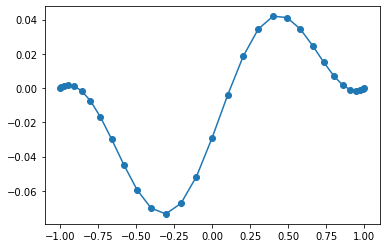

In [15]:
plt.plot(x,u_approx2,'-o')